In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import random
import numpy as np
import pandas as pd

In [11]:
import plotting
from load_dataset import Dataset

In [2]:
dataset = Dataset('../data/dataset/')

In [14]:
ts = dataset['hour_376.csv']

In [17]:
ts = ts[-300:]

In [35]:
multi_ts = pd.DataFrame()

In [38]:
for i in range(7):
    constant = random.randint(0, 40)
    noize = pd.Series([random.randrange(0, 5) for _ in ts], index=ts.index)
    bucket = ts + constant + noize
    multi_ts[f'bucket_{i}'] = bucket

In [68]:
multi_ts.head()

,bucket_0,bucket_1,bucket_2,bucket_3,bucket_4,bucket_5,bucket_6
2019-05-19T03:00:00,,,,,,,
2019-06-06 13:00:00,91.0,72.0,91.0,103.0,73.0,73.0,85.0
2019-06-06 14:00:00,76.0,54.0,76.0,89.0,59.0,58.0,68.0
2019-06-06 15:00:00,64.0,45.0,63.0,78.0,47.0,48.0,58.0
2019-06-06 16:00:00,57.0,36.0,56.0,71.0,38.0,40.0,53.0
2019-06-06 17:00:00,47.0,24.0,49.0,59.0,29.0,28.0,42.0


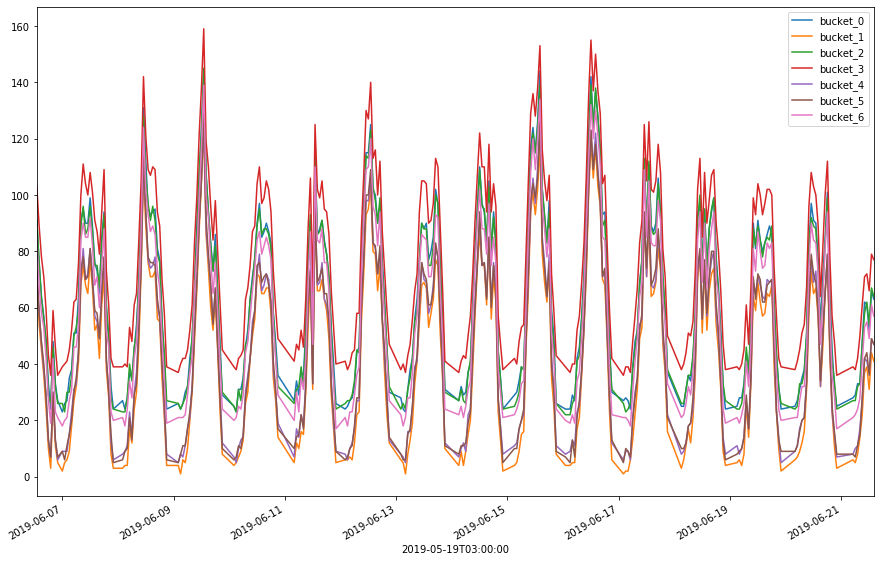

In [70]:
multi_ts.plot(figsize=(15, 10))

In [42]:
from stability_index import calculate_si

In [62]:
def normalize_ts(multi_ts: pd.DataFrame):
    return multi_ts.apply(lambda x: x / x.sum(), axis=1)

In [89]:
norm_ts = normalize_ts(multi_ts)

In [77]:
si = pd.Series([calculate_si(norm_ts.iloc[-i].values, norm_ts.iloc[-i-24]) for i in range(50)],
               index=norm_ts.index[-50:])

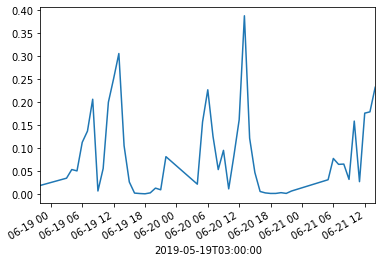

In [78]:
si.plot()

In [82]:
multi_ts.iloc[-10]['bucket_3'] = 100000

In [90]:
si = pd.Series([calculate_si(norm_ts.iloc[-i].values, norm_ts.iloc[-i-1]) for i in range(50)],
               index=norm_ts.index[-50:])

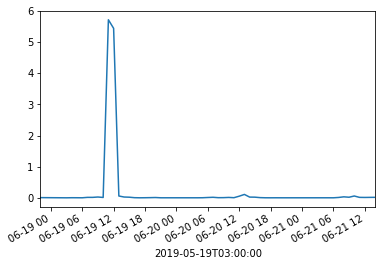

In [91]:
si.plot()